In [3]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner

plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

from model_selection import Evidence_model_selection as EMS

# Experiment: 2 term truth with 1 moment
### Monotonic but not positive definite

In [4]:
# Set up the experiment
nTruth = 2
nMoment = 1
param_Truth = [ 5.0,-1.5, 0.75, -0.5]

In [5]:
# Initialize the model selection object
Ex1 = EMS(nTruth,nMoment,param_Truth)

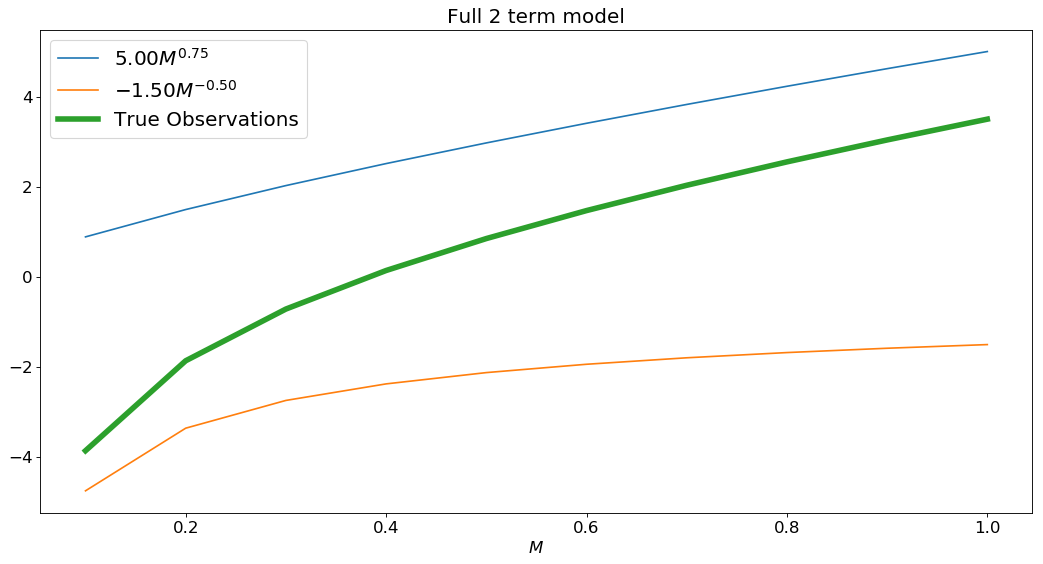

In [6]:
# Run a synthetic experiment and generate data, the data becomes an attribute of the object
Ex1.get_data()
# Plot the data
Ex1.plot_truth()

In [7]:
# Run model selection

# Models indicates how many models are being compared, the integer references the number of terms in the model
# dlnZ_tol is the tolerance for estimated the log evidence using thermodynamic integration
# MCMC_Steps is the number of steps in each MCMC chain

Ex1.model_selection(Models=[1, 2, 3], dlnZ_tol=1, MCMC_Steps=2000)


Results:
Model 1 with  lnZ =  -104.65347707979323 , dlnZ =  0.4385236659967262
Model 2 with  lnZ =  -10.751457463250814 , dlnZ =  0.7906568700961945
Model 3 with  lnZ =  -11.433534462318441 , dlnZ =  0.6789330442082964

===== WARNING ======

The model selection is inconclusive because the estimated
evidence of multiple models are within the errors of each other.



In [8]:
# Run a long MCMC simulation for the selected model to view the parameter space

Ex1.ntemps = 10 # Reset the number of temperatures used to make the long MCMC simulation shorter

sampler = Ex1.run_MCMC(nTerms=Ex1.selected_model,MCMC_Steps = int(1E4))

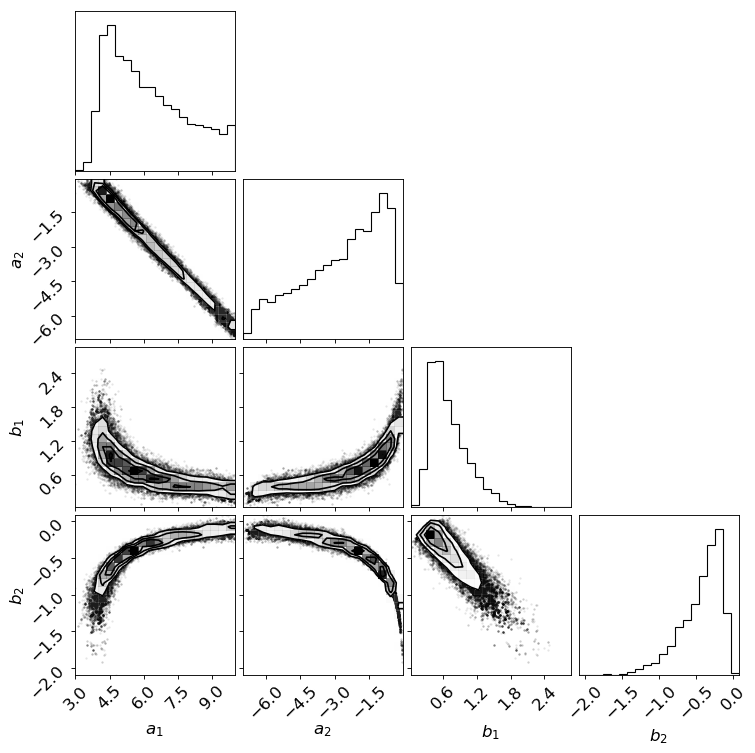

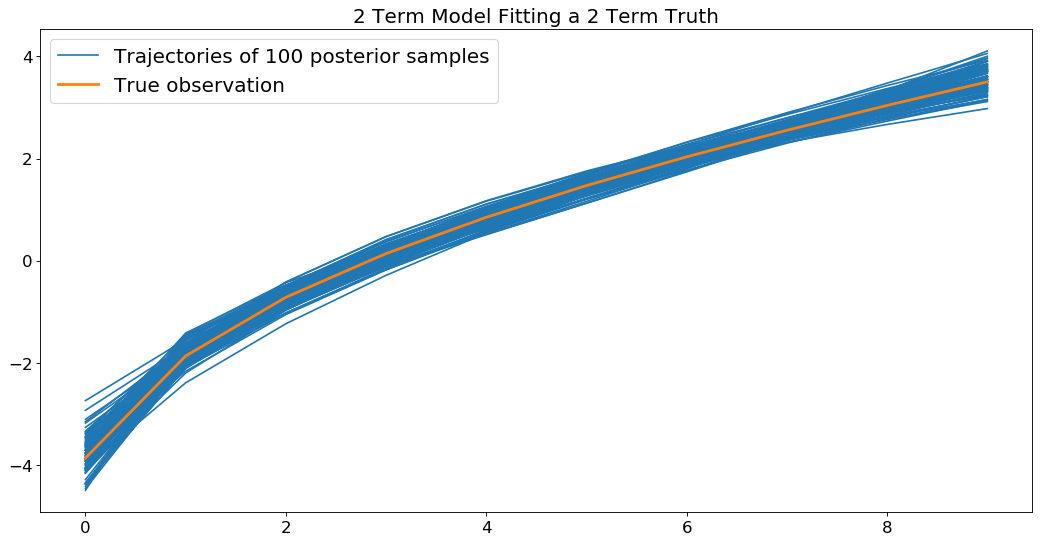

In [9]:
# Plot the results
Ex1.plot_sampler(sampler,nTerms=Ex1.selected_model)